# K-Means Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("customer.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [6]:
df.drop('customerID',axis=1,inplace=True)

# Covert all columns to Numerical

In [8]:
cat_feats = ['gender','Partner','Dependents','PhoneService','MultipleLines',
             'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
             'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
             'PaymentMethod']

In [9]:
X = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
SeniorCitizen                            7043 non-null int64
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null float64
gender_Male                              7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                       7043 non-null uint8
OnlineBackup_No internet service   

# Principal Component Analysis

Running dimensionality reduction algorithm such as Principal component analysis (PCA) prior to K-Means reduces the effects of the curse of dimensionality. PCA reduces the number of features. This can be done by either removing or combining features.

The new features are referred to as **components**. 

In [11]:
from sklearn.decomposition import PCA


In [12]:
pca = PCA(n_components=2, random_state=42)

In [13]:
X = pca.fit_transform(X)

In [14]:
X

array([[-2.25247434e+03, -8.87111061e+00],
       [-3.92438828e+02, -6.22697593e+00],
       [-2.17396397e+03,  1.19084481e+01],
       ...,
       [-1.93581156e+03, -1.47187833e+01],
       [-1.97533371e+03,  2.87116421e+01],
       [ 4.56288517e+03,  4.46057863e+00]])

# Scaling

In [15]:
sc = StandardScaler() 
# Standardize features by removing the mean and scaling to unit variance
X = sc.fit_transform(X)

# [Implement K-Means Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

In [16]:
kmeans = KMeans(random_state=42,n_clusters= 4)

In [17]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

k-means++ initializes the centroids to be  distant from each other, leading to better results than random initialization

In [18]:
 kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

Inertia measures how internally coherent clusters are

In [19]:
# The lowest SSE 
# Sum of squared distances of samples to their closest cluster center.
kmeans.inertia_

2909.495324993338

In [20]:
# centroid locations
kmeans.cluster_centers_

array([[-0.44478244,  0.16226078],
       [ 1.47175233, -0.00207277],
       [-0.57734274, -1.20127968],
       [-0.52345536,  1.27290142]])

In [21]:
# iterations to run
kmeans.n_iter_

5

In [22]:
kmeans.labels_

array([0, 0, 0, ..., 2, 3, 1], dtype=int32)

In [23]:
kmeans.labels_[:15]

array([0, 0, 0, 2, 3, 3, 3, 2, 3, 2, 0, 2, 1, 1, 3], dtype=int32)

# Finding the best number of clusters

In [24]:
sse = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [25]:
cluster_df = pd.DataFrame({'Cluster':range(1,13), 'sse':sse})
cluster_df.head()

,Cluster,sse
0,1,14086.000000
1,2,8586.321226
2,3,3657.794725
3,4,2909.395827
4,5,2301.404021


Text(0, 0.5, 'Inertia')

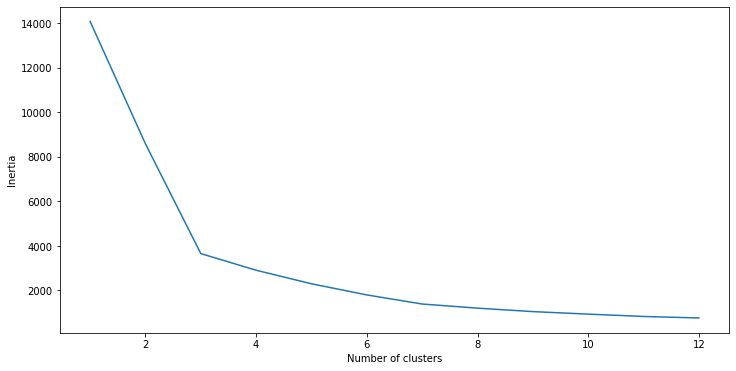

In [26]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df['Cluster'], cluster_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [27]:
kl = KneeLocator(range(1, 13), sse, curve="convex", direction="decreasing" )

In [28]:
kl.elbow

3

In [29]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
predictions = kmeans.predict(X)

In [30]:
predictions

array([0, 0, 1, ..., 0, 1, 2], dtype=int32)

In [31]:
df['cluster'] = predictions
df['cluster'].value_counts()

1    2747
0    2397
2    1899
Name: cluster, dtype: int64

In [32]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,cluster
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,1
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,2
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,2


In [33]:
cluster_one = df[df['cluster'] == 0]

In [34]:
cluster_one.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,cluster
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


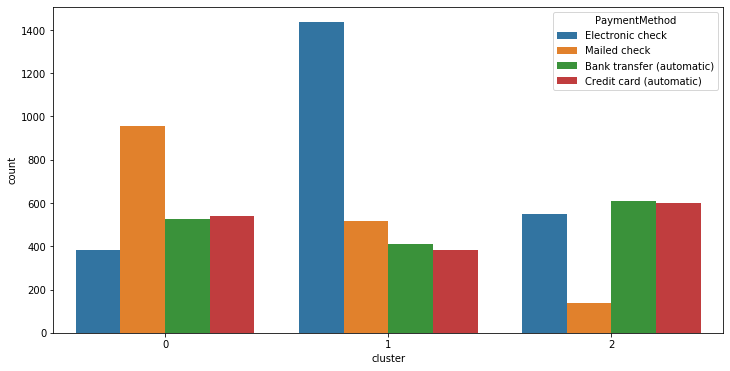

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='cluster', data = df, hue='PaymentMethod')

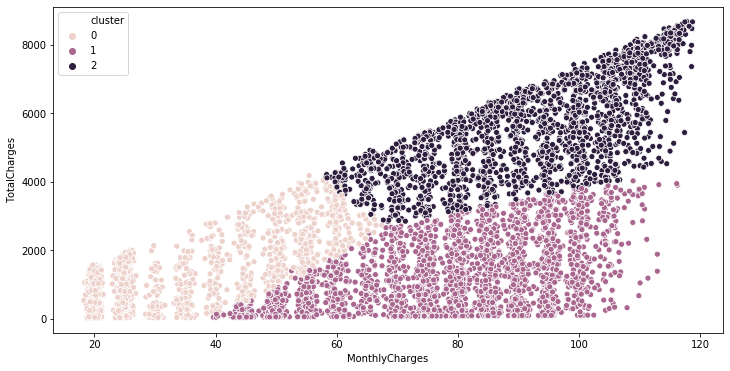

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='MonthlyCharges',y="TotalCharges", data = df, hue='cluster')

Happy Clustering!